### Requirements and setup


In [101]:
import subprocess
import sys

# Function to install a package if it's not already installed
def install_package(package):
    try:
        # Try importing the package to check if it's already installed
        __import__(package)
        print(f"{package} is already installed.")
    except ImportError:
        # If not installed, try installing it
        print(f"Installing {package}...")
        subprocess.check_call([sys.executable, "-m", "pip", "install", package])

# List of packages
packages = [
    'PyMuPDF==1.23.26',
    'matplotlib==3.8.3',
    'numpy==1.26.4',
    'pandas==2.2.1',
    'requests==2.31.0',
    'sentence_transformers==2.5.1',
    'spacy',
    'tqdm==4.66.2',
    'torch==2.4.0',
    'transformers==4.38.2',
    'accelerate',
    'bitsandbytes',
    'jupyter',
    'wheel'
]

# Install the packages
for package in packages:
    install_package(package)


Installing PyMuPDF==1.23.26...
Installing matplotlib==3.8.3...
Installing numpy==1.26.4...
Installing pandas==2.2.1...
Installing requests==2.31.0...
Installing sentence_transformers==2.5.1...
spacy is already installed.
Installing tqdm==4.66.2...
Installing torch==2.4.0...
Installing transformers==4.38.2...
accelerate is already installed.
bitsandbytes is already installed.
jupyter is already installed.
wheel is already installed.


### 1. Document/Text Processing and Embedding Creation


In [102]:
import os
import requests

# Get PDF document path
pdf_path = "human_nutrition-text.pdf"

# Download PDF
if not os.path.exists(pdf_path):
    print("[INFO] File doesn't exist, downloading")

    # Enter the URL of the pdf
    url = "https://pressbooks.oer.hawaii.edu/humannutrition2/open/download?type=pdf"

    # The local filename to save the download file
    filename = pdf_path

    # Send a GET request to the URL
    response = requests.get(url)

    # Check if request was successful
    if response.status_code == 200:
        # Open the file and save it
        with open(filename, "wb") as file:
            file.write(response.content)
        print(f"[INFO] The file has been download and saved as {filename}")
    else:
        print(f"[INFO] Failed to download the file. Status code: {response.stauts_code}")
else:
    print(f"File {pdf_path} exists.")

File human_nutrition-text.pdf exists.


In [103]:
import fitz
from tqdm import tqdm

def text_formatter(text: str) -> str:
    """Perform minor formatting on text."""
    cleaned_text = text.replace("\n", " ").strip()

    # Potentially more text formatting functions can go here
    return cleaned_text

def open_and_read_pdf(pdf_path: str) -> list[dict]:
    doc = fitz.open(pdf_path)
    pages_and_texts = []
    for page_number, page in tqdm(enumerate(doc)):
        text = page.get_text()
        text = text_formatter(text=text)
        pages_and_texts.append({"page_number": page_number - 41,
                               "page_char_count": len(text),
                               "page_word_count": len(text.split(" ")),
                               "page_sentence_count_raw": len(text.split(". ")),
                               "page_token_count": len(text) / 4, # 1 token = ~4 characters
                               "text": text})
    return pages_and_texts

In [104]:
pages_and_texts = open_and_read_pdf(pdf_path=pdf_path)
pages_and_texts[:2]

1208it [00:01, 635.24it/s]


[{'page_number': -41,
  'page_char_count': 29,
  'page_word_count': 4,
  'page_sentence_count_raw': 1,
  'page_token_count': 7.25,
  'text': 'Human Nutrition: 2020 Edition'},
 {'page_number': -40,
  'page_char_count': 0,
  'page_word_count': 1,
  'page_sentence_count_raw': 1,
  'page_token_count': 0.0,
  'text': ''}]

In [105]:
import random

random.sample(pages_and_texts, k=3)

[{'page_number': 777,
  'page_char_count': 156,
  'page_word_count': 30,
  'page_sentence_count_raw': 3,
  'page_token_count': 39.0,
  'text': 'PART\xa0XIII  CHAPTER 13. LIFESPAN  NUTRITION FROM  PREGNANCY TO THE  TODDLER YEARS  Chapter 13. Lifespan Nutrition From Pregnancy to the Toddler Years  |  777'},
 {'page_number': 902,
  'page_char_count': 0,
  'page_word_count': 1,
  'page_sentence_count_raw': 1,
  'page_token_count': 0.0,
  'text': ''},
 {'page_number': 310,
  'page_char_count': 1460,
  'page_word_count': 247,
  'page_sentence_count_raw': 14,
  'page_token_count': 365.0,
  'text': 'an unsaturated fatty acid, can result in different structures for the  same fatty acid composition. When the hydrogen atoms are bonded  to the same side of the carbon chain, it is called a cis fatty acid.  Because the hydrogen atoms are on the same side, the carbon chain  has a bent structure. Naturally occurring fatty acids usually have a  cis configuration.  In a trans fatty acid, the hydrogen at

### Get some stats on the text


In [106]:
import pandas as pd

df = pd.DataFrame(pages_and_texts)
df.head()

,page_number,page_char_count,page_word_count,page_sentence_count_raw,page_token_count,text
0,-41,29,4,1,7.25,Human Nutrition: 2020 Edition
1,-40,0,1,1,0.00,
2,-39,320,54,1,80.00,Human Nutrition: 2020 Edition UNIVERSITY OF ...
3,-38,212,32,1,53.00,Human Nutrition: 2020 Edition by University of...
4,-37,797,145,2,199.25,Contents Preface University of Hawai‘i at Mā...


In [107]:
df.describe().round(2)

,page_number,page_char_count,page_word_count,page_sentence_count_raw,page_token_count
count,1208.00,1208.00,1208.00,1208.00,1208.00
mean,562.50,1148.00,198.30,9.97,287.00
std,348.86,560.38,95.76,6.19,140.10
min,-41.00,0.00,1.00,1.00,0.00
25%,260.75,762.00,134.00,4.00,190.50
50%,562.50,1231.50,214.50,10.00,307.88
75%,864.25,1603.50,271.00,14.00,400.88
max,1166.00,2308.00,429.00,32.00,577.00


### Further text processing (splitting pages into sentences)


In [108]:
from spacy.lang.en import English

nlp = English()

# Add a sentencizer pipeline
nlp.add_pipe("sentencizer")

# Create document instance as 
doc = nlp("This is a sentence. This is sentence 2. I like machine learning.")
assert len(list(doc.sents)) == 3

# Print out our sentence split
list(doc.sents)

[This is a sentence., This is sentence 2., I like machine learning.]

In [109]:
for item in tqdm(pages_and_texts):
    item["sentences"] = list(nlp(item["text"]).sents)

    # Make sure all sentences are strings (default type of spacy)
    item["sentences"] = [str(sentence) for sentence in item["sentences"]]

    # Count the sentences
    item["page_sentence_count_spacy"] = len(item["sentences"])

100%|██████████| 1208/1208 [00:02<00:00, 522.64it/s]


In [110]:
random.sample(pages_and_texts, k=1)

[{'page_number': 177,
  'page_char_count': 1915,
  'page_word_count': 323,
  'page_sentence_count_raw': 23,
  'page_token_count': 478.75,
  'text': 'Sodium Imbalances  Sweating is a homeostatic mechanism for maintaining body  temperature, which influences fluid and electrolyte balance. Sweat  is mostly water but also contains some electrolytes, mostly sodium  and chloride. Under normal environmental conditions (i.e., not hot,  humid days) water and sodium loss through sweat is negligible,  but is highly variable among individuals. It is estimated that sixty  minutes of high-intensity physical activity, like playing a game of  tennis, can produce approximately one liter of sweat; however the  amount of sweat produced is highly dependent on environmental  conditions. A liter of sweat typically contains between 1 and 2 grams  of sodium and therefore exercising for multiple hours can result in a  high amount of sodium loss in some people. Additionally, hard labor  can produce substantial s

In [111]:
df = pd.DataFrame(pages_and_texts)
df.describe().round(2)

,page_number,page_char_count,page_word_count,page_sentence_count_raw,page_token_count,page_sentence_count_spacy
count,1208.00,1208.00,1208.00,1208.00,1208.00,1208.00
mean,562.50,1148.00,198.30,9.97,287.00,10.32
std,348.86,560.38,95.76,6.19,140.10,6.30
min,-41.00,0.00,1.00,1.00,0.00,0.00
25%,260.75,762.00,134.00,4.00,190.50,5.00
50%,562.50,1231.50,214.50,10.00,307.88,10.00
75%,864.25,1603.50,271.00,14.00,400.88,15.00
max,1166.00,2308.00,429.00,32.00,577.00,28.00


### Chunking our sentences together


In [112]:
# Define split size to turn groups of sentences into chunks
num_sentence_chunk_size = 10

# Create a function to split lists of texts recursively into chunk size
def split_list(input_list: list,
              slice_size: int=num_sentence_chunk_size) -> list[list[str]]:
    
    return [input_list[i:i + slice_size] for i in range(0, len(input_list), slice_size)]

test_list = list(range(25))
split_list(test_list)

[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [20, 21, 22, 23, 24]]

In [113]:
# Loop through pages and texts and split sentences into chunks
for item in tqdm(pages_and_texts):
    item["sentence_chunks"] = split_list(input_list=item["sentences"],
                                        slice_size=num_sentence_chunk_size)
    
    item["num_chunks"] = len(item["sentence_chunks"])

100%|██████████| 1208/1208 [00:00<00:00, 335855.71it/s]


In [114]:
random.sample(pages_and_texts, k =1)

[{'page_number': 161,
  'page_char_count': 610,
  'page_word_count': 100,
  'page_sentence_count_raw': 4,
  'page_token_count': 152.5,
  'text': 'Learning activities may be used across various mobile  devices, however, for the best user experience it is strongly  recommended that users complete these activities using a  desktop or laptop computer and in Google Chrome.  \xa0 An interactive or media element has been  excluded from this version of the text. You can  view it online here:  http://pressbooks.oer.hawaii.edu/ humannutrition2/?p=139  \xa0 An interactive or media element has been  excluded from this version of the text. You can  view it online here:  http://pressbooks.oer.hawaii.edu/ humannutrition2/?p=139  Water’s Importance to Vitality  |  161',
  'sentences': ['Learning activities may be used across various mobile  devices, however, for the best user experience it is strongly  recommended that users complete these activities using a  desktop or laptop computer and in Google C

In [115]:
df = pd.DataFrame(pages_and_texts)
df.describe().round(2)

,page_number,page_char_count,page_word_count,page_sentence_count_raw,page_token_count,page_sentence_count_spacy,num_chunks
count,1208.00,1208.00,1208.00,1208.00,1208.00,1208.00,1208.00
mean,562.50,1148.00,198.30,9.97,287.00,10.32,1.53
std,348.86,560.38,95.76,6.19,140.10,6.30,0.64
min,-41.00,0.00,1.00,1.00,0.00,0.00,0.00
25%,260.75,762.00,134.00,4.00,190.50,5.00,1.00
50%,562.50,1231.50,214.50,10.00,307.88,10.00,1.00
75%,864.25,1603.50,271.00,14.00,400.88,15.00,2.00
max,1166.00,2308.00,429.00,32.00,577.00,28.00,3.00


### Splitting each chunk into its own item


In [116]:
import re

# Split each chunk into its own item
pages_and_chunks = []
for item in tqdm(pages_and_texts):
    for sentence_chunk in item["sentence_chunks"]:
        chunk_dict = {}
        chunk_dict["page_number"] = item["page_number"]

        # Join the sentences together into a pagagraph-like structure, aka join the list of sentences into one paragraph
        joined_sentence_chunk = "".join(sentence_chunk).replace("  ", " ").strip()
        joined_sentence_chunk = re.sub(r"\.([A-Z])", r". \1", joined_sentence_chunk)
        
        chunk_dict["sentence_chunk"] = joined_sentence_chunk

        # Get some stats on our chunks
        chunk_dict["chunk_char_count"] = len(joined_sentence_chunk)
        chunk_dict["chunk_word_count"] = len([word for word in joined_sentence_chunk.split(" ")])
        chunk_dict["chunk_token_count"] = len(joined_sentence_chunk) / 4 # 1 token ~ 4 chars 

        pages_and_chunks.append(chunk_dict)
len(pages_and_chunks)

100%|██████████| 1208/1208 [00:00<00:00, 25189.01it/s]


1843

In [117]:
random.sample(pages_and_chunks, k=1)

[{'page_number': 103,
  'sentence_chunk': 'Bronchioles lead to alveolar sacs in the respiratory zone, where gas exchange occurs. Gross Anatomy of the Lungs The lungs are pyramid-shaped, paired organs that are connected to the trachea by the right and left bronchi; below the lungs is the diaphragm, a flat, dome-shaped muscle located at the base of the lungs and thoracic cavity. Figure 2.18 Basic Anatomy of the Lungs \xa0 Each lung is composed of smaller units called lobes. Fissures separate these lobes from each other. The right lung consists of three lobes: the superior, middle, and inferior lobes. The left lung consists of two lobes: the superior and inferior lobes. Blood Supply The major function of the lungs is to perform gas exchange, which requires blood flowing through the lung tissues (the pulmonary circulation). This blood supply contains deoxygenated blood and travels to the lungs where erythrocytes, also known as red blood The Respiratory System | 103',
  'chunk_char_count': 

In [118]:
df = pd.DataFrame(pages_and_chunks)
df.describe().round(2)

,page_number,chunk_char_count,chunk_word_count,chunk_token_count
count,1843.00,1843.00,1843.00,1843.00
mean,583.38,734.44,112.33,183.61
std,347.79,447.54,71.22,111.89
min,-41.00,12.00,3.00,3.00
25%,280.50,315.00,44.00,78.75
50%,586.00,746.00,114.00,186.50
75%,890.00,1118.50,173.00,279.62
max,1166.00,1831.00,297.00,457.75


In [119]:
df.head()

,page_number,sentence_chunk,chunk_char_count,chunk_word_count,chunk_token_count
0,-41,Human Nutrition: 2020 Edition,29,4,7.25
1,-39,Human Nutrition: 2020 Edition UNIVERSITY OF HA...,308,42,77.00
2,-38,Human Nutrition: 2020 Edition by University of...,210,30,52.50
3,-37,Contents Preface University of Hawai‘i at Māno...,766,114,191.50
4,-36,Lifestyles and Nutrition University of Hawai‘i...,941,142,235.25


### Filter chunks of text for short chunks
These chunks may not contain much useful information.

In [120]:
# Show random chunks with under 30 tokens in length
min_token_length = 30

for row in df[df["chunk_token_count"] <= min_token_length].sample(5).iterrows():
    print(f"Chunk token count : {row[1]['chunk_token_count']} | Text: {row[1]['sentence_chunk']}")

Chunk token count : 24.75 | Text: Free radical reactions can continue unchecked unless stopped by a defense mechanism. The Atom | 461
Chunk token count : 12.5 | Text: Figure 11.2 The Structure of Hemoglobin Iron | 655
Chunk token count : 13.0 | Text: Accessed September 22, 2017. 478 | Weight Management
Chunk token count : 8.25 | Text: Regulation of Water Balance | 165
Chunk token count : 28.75 | Text: Image by FDA/ Changes to the Nutrition Facts Label Figure 12.5 Food Serving Sizes 728 | Discovering Nutrition Facts


In [121]:
df[df["chunk_token_count"] > min_token_length].head(2).to_dict()

{'page_number': {1: -39, 2: -38},
 'sentence_chunk': {1: 'Human Nutrition: 2020 Edition UNIVERSITY OF HAWAI‘I AT MĀNOA FOOD SCIENCE AND HUMAN NUTRITION PROGRAM ALAN TITCHENAL, SKYLAR HARA, NOEMI ARCEO CAACBAY, WILLIAM MEINKE-LAU, YA-YUN YANG, MARIE KAINOA FIALKOWSKI REVILLA, JENNIFER DRAPER, GEMADY LANGFELDER, CHERYL GIBBY, CHYNA NICOLE CHUN, AND ALLISON CALABRESE',
  2: 'Human Nutrition: 2020 Edition by University of Hawai‘i at Mānoa Food Science and Human Nutrition Program is licensed under a Creative Commons Attribution 4.0 International License, except where otherwise noted.'},
 'chunk_char_count': {1: 308, 2: 210},
 'chunk_word_count': {1: 42, 2: 30},
 'chunk_token_count': {1: 77.0, 2: 52.5}}

In [122]:
# Filter out DataFrame for rows with under 30 tokens
pages_and_chunks_over_min_token_len = df[df["chunk_token_count"] > min_token_length].to_dict(orient="records")
pages_and_chunks_over_min_token_len[:2]

[{'page_number': -39,
  'sentence_chunk': 'Human Nutrition: 2020 Edition UNIVERSITY OF HAWAI‘I AT MĀNOA FOOD SCIENCE AND HUMAN NUTRITION PROGRAM ALAN TITCHENAL, SKYLAR HARA, NOEMI ARCEO CAACBAY, WILLIAM MEINKE-LAU, YA-YUN YANG, MARIE KAINOA FIALKOWSKI REVILLA, JENNIFER DRAPER, GEMADY LANGFELDER, CHERYL GIBBY, CHYNA NICOLE CHUN, AND ALLISON CALABRESE',
  'chunk_char_count': 308,
  'chunk_word_count': 42,
  'chunk_token_count': 77.0},
 {'page_number': -38,
  'sentence_chunk': 'Human Nutrition: 2020 Edition by University of Hawai‘i at Mānoa Food Science and Human Nutrition Program is licensed under a Creative Commons Attribution 4.0 International License, except where otherwise noted.',
  'chunk_char_count': 210,
  'chunk_word_count': 30,
  'chunk_token_count': 52.5}]

In [123]:
random.sample(pages_and_chunks_over_min_token_len, k=1)

[{'page_number': 318,
  'sentence_chunk': 'recommended that users complete these activities using a desktop or laptop computer and in Google Chrome. \xa0 An interactive or media element has been excluded from this version of the text. You can view it online here: http://pressbooks.oer.hawaii.edu/ humannutrition2/?p=218 \xa0 318 | Nonessential and Essential Fatty Acids',
  'chunk_char_count': 321,
  'chunk_word_count': 47,
  'chunk_token_count': 80.25}]

### Embedding our text chunks

In [124]:
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

### Embedding our text chunks


In [125]:
from sentence_transformers import SentenceTransformer

# Create a embedding model
embedding_model = SentenceTransformer('all-mpnet-base-v2', device=device)

embeddings = embedding_model.encode("I love machine learning")
print(embeddings.shape)

/opt/conda/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:1617: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be deprecated in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

(768,)


In [126]:
%%time 

text_chunks = [item["sentence_chunk"] for item in pages_and_chunks_over_min_token_len]
text_chunks[12]

CPU times: user 376 µs, sys: 0 ns, total: 376 µs
Wall time: 385 µs


'The Body’s Offense University of Hawai‘i at Mānoa Food Science and Human Nutrition Program and Human Nutrition Program 597 Phytochemicals University of Hawai‘i at Mānoa Food Science and Human Nutrition Program and Human Nutrition Program 600 Part\xa0X.\xa0Chapter 10. Major Minerals Introduction University of Hawai‘i at Mānoa Food Science and Human Nutrition Program and Human Nutrition Program 609 Calcium University of Hawai‘i at Mānoa Food Science and Human Nutrition Program and Human Nutrition Program 613 Phosphorus University of Hawai‘i at Mānoa Food Science and Human Nutrition Program and Human Nutrition Program 631 Sulfur University of Hawai‘i at Mānoa Food Science and Human Nutrition Program and Human Nutrition Program 635 Magnesium University of Hawai‘i at Mānoa Food Science and Human Nutrition Program and Human Nutrition Program 640'

In [127]:
len(text_chunks)

1680

In [128]:
%%time

embedding_model.to(device)

text_chunk_embedding = embedding_model.encode(
    text_chunks,
    batch_size=32,
    convert_to_tensor=False
)

# Assign each embedding to the respective item in pages_and_over_min_token_len
for idx, item in enumerate(tqdm(pages_and_chunks_over_min_token_len)):
    item["embedding"] = text_chunk_embedding[idx]

Batches:   0%|          | 0/53 [00:00<?, ?it/s]

100%|██████████| 1680/1680 [00:00<00:00, 1391750.09it/s]

CPU times: user 23.5 s, sys: 479 ms, total: 24 s
Wall time: 13.9 s


In [129]:
# Save embeddings to file
text_chunks_and_embeddings_df = pd.DataFrame(pages_and_chunks_over_min_token_len)
embeddings_df_save_path = "text_chunks_and_embeddings_df.csv"
text_chunks_and_embeddings_df.to_csv(embeddings_df_save_path, index=False)

In [130]:
# Import saved file and view
text_chunks_and_embeddings_df_load = pd.read_csv(embeddings_df_save_path)
text_chunks_and_embeddings_df_load.head()

,page_number,sentence_chunk,chunk_char_count,chunk_word_count,chunk_token_count,embedding
0,-39,Human Nutrition: 2020 Edition UNIVERSITY OF HA...,308,42,77.00,[ 6.74242601e-02 9.02282074e-02 -5.09547768e-...
1,-38,Human Nutrition: 2020 Edition by University of...,210,30,52.50,[ 5.52156083e-02 5.92139438e-02 -1.66167226e-...
2,-37,Contents Preface University of Hawai‘i at Māno...,766,114,191.50,[ 2.79801711e-02 3.39814313e-02 -2.06426643e-...
3,-36,Lifestyles and Nutrition University of Hawai‘i...,941,142,235.25,[ 6.82566911e-02 3.81274782e-02 -8.46855436e-...
4,-35,The Cardiovascular System University of Hawai‘...,998,152,249.50,[ 3.30264196e-02 -8.49765539e-03 9.57158115e-...


### 2. RAG - Search and Answer

### Similarity Search

In [131]:
import random

import torch
import numpy as np
import pandas as pd

device = "cuda" if torch.cuda.is_available() else "cpu"

# Import texts and embedding df
text_chunks_and_embedding_df = pd.read_csv("text_chunks_and_embeddings_df.csv")

# Convert embedding col back to np.array (it got converted to string when it saved to CSV)
text_chunks_and_embedding_df["embedding"] = text_chunks_and_embedding_df["embedding"].apply(lambda x: np.fromstring(x.strip("[]"), sep="  "))

# Convert our embeddings into a torch.tensor
embeddings = torch.tensor(np.stack(text_chunks_and_embedding_df["embedding"].tolist(), axis=0), dtype=torch.float32).to(device)

# Convert texts  and embedding df to list of dicts
pages_and_chunks = text_chunks_and_embedding_df.to_dict(orient="records")

text_chunks_and_embedding_df

,page_number,sentence_chunk,chunk_char_count,chunk_word_count,chunk_token_count,embedding
0,-39,Human Nutrition: 2020 Edition UNIVERSITY OF HA...,308,42,77.00,"[0.0674242601, 0.0902282074, -0.00509547768, -..."
1,-38,Human Nutrition: 2020 Edition by University of...,210,30,52.50,"[0.0552156083, 0.0592139438, -0.0166167226, -0..."
2,-37,Contents Preface University of Hawai‘i at Māno...,766,114,191.50,"[0.0279801711, 0.0339814313, -0.0206426643, 0...."
3,-36,Lifestyles and Nutrition University of Hawai‘i...,941,142,235.25,"[0.0682566911, 0.0381274782, -0.00846855436, -..."
4,-35,The Cardiovascular System University of Hawai‘...,998,152,249.50,"[0.0330264196, -0.00849765539, 0.00957158115, ..."
...,...,...,...,...,...,...
1675,1164,Flashcard Images Note: Most images in the flas...,1305,176,326.25,"[0.0185622647, -0.0164278075, -0.0127045643, -..."
1676,1164,Hazard Analysis Critical Control Points reused...,375,51,93.75,"[0.0334721208, -0.0570440404, 0.0151489321, -0..."
1677,1165,ShareAlike 11. Organs reused “Pancreas Organ A...,1286,173,321.50,"[0.0770515576, 0.00978558045, -0.0121817328, 0..."
1678,1165,Sucrose reused “Figure 03 02 05” by OpenStax B...,410,59,102.50,"[0.10304518, -0.0164701827, 0.00826845597, 0.0..."


In [132]:
print(type(text_chunks_and_embedding_df["embedding"].iloc[0]))
print(text_chunks_and_embedding_df["embedding"].iloc[0].shape)

<class 'numpy.ndarray'>
(768,)


In [133]:
embeddings.shape

torch.Size([1680, 768])

In [134]:
# Create model
from sentence_transformers import util, SentenceTransformer

embedding_model = SentenceTransformer(model_name_or_path="all-mpnet-base-v2",
                                     device=device)

/opt/conda/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:1617: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be deprecated in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [135]:
# 1. Define the query
query = "plant based proteins"
print(f"Query: {query}")

# 2. Embed the query
# Note: it's import to embed you query with the same model you embedding your passage
query_embedding = embedding_model.encode(query, convert_to_tensor=True).to(device)

# 3. Get similarity scores with dot product (use cosine similarity if outputs of model aren't noramlized)
from time import perf_counter as timer

start_time = timer()
# Note: model.encode return the noramlized/L2 norm 
# so, we can use dot_score rather than cosine similarity
dot_scores = util.dot_score(a=query_embedding, b=embeddings)[0]
# print(dot_scores)
end_time = timer()

print(f"[INFO] Time taken to get scores on {len(embeddings)} embeddings: {end_time - start_time:.5f} seconds")

# 4. Get the top-k results (we'll keep top 5)
top_results_dot_product = torch.topk(dot_scores, k=5)
top_results_dot_product

Query: plant based proteins


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

[INFO] Time taken to get scores on 1680 embeddings: 0.00035 seconds


torch.return_types.topk(
values=tensor([0.6646, 0.6355, 0.6355, 0.6288, 0.6128], device='cuda:0'),
indices=tensor([618, 619, 617, 611, 621], device='cuda:0'))

In [136]:
page_number = pages_and_chunks[618]["page_number"]
sentence_chunk = pages_and_chunks[618]["sentence_chunk"]

print("Page Number:", page_number)
print("Sentence Chunk:", sentence_chunk)

Page Number: 415
Sentence Chunk: Protein-rich Foods by Smastronard o / CC BY-SA 4.0 Examples of complete protein sources include soy, dairy products, meat, and seafood. Examples of incomplete protein sources include legumes and corn. Most plant-based foods are deficient in at least one essential amino acid and therefore are incomplete protein sources. For example, grains are usually deficient in the amino acid lysine, and legumes are deficient in methionine or tryptophan. Because grains and legumes are not deficient in the same amino acids they can complement each other in a diet. Incomplete protein foods are called complementary foods because when consumed in tandem they contain all nine essential amino acids at adequate levels. Some examples of complementary protein foods are given in Table 6.4 “Complementing Protein Sources the Vegan Way”. Complementary protein sources do not have to be consumed at the same time—as long as they are consumed within the same day, you will meet your pr

In [137]:
import textwrap

def print_wrapped(text, wrap_length=90):
    wrapped_text = textwrap.fill(text, wrap_length)
    print(wrapped_text)

In [138]:
print(f"Query: '{query}'\n")
print("Results: ")
# Loop through zipped together scores and indices from torch.topk
for score, idx in zip(top_results_dot_product[0], top_results_dot_product[1]):
    print(f"Score: {score:.4f}")
    print("Text: ")
    print_wrapped(pages_and_chunks[idx]["sentence_chunk"])
    print(f"Page number: {pages_and_chunks[idx]['page_number']}")
    print("\n")

Query: 'plant based proteins'

Results: 
Score: 0.6646
Text: 
Protein-rich Foods by Smastronard o / CC BY-SA 4.0 Examples of complete protein sources
include soy, dairy products, meat, and seafood. Examples of incomplete protein sources
include legumes and corn. Most plant-based foods are deficient in at least one essential
amino acid and therefore are incomplete protein sources. For example, grains are usually
deficient in the amino acid lysine, and legumes are deficient in methionine or tryptophan.
Because grains and legumes are not deficient in the same amino acids they can complement
each other in a diet. Incomplete protein foods are called complementary foods because when
consumed in tandem they contain all nine essential amino acids at adequate levels. Some
examples of complementary protein foods are given in Table 6.4 “Complementing Protein
Sources the Vegan Way”. Complementary protein sources do not have to be consumed at the
same time—as long as they are consumed within the sa

Text(0.5, 1.0, "Query: 'plant based proteins' | Most relevant page:")

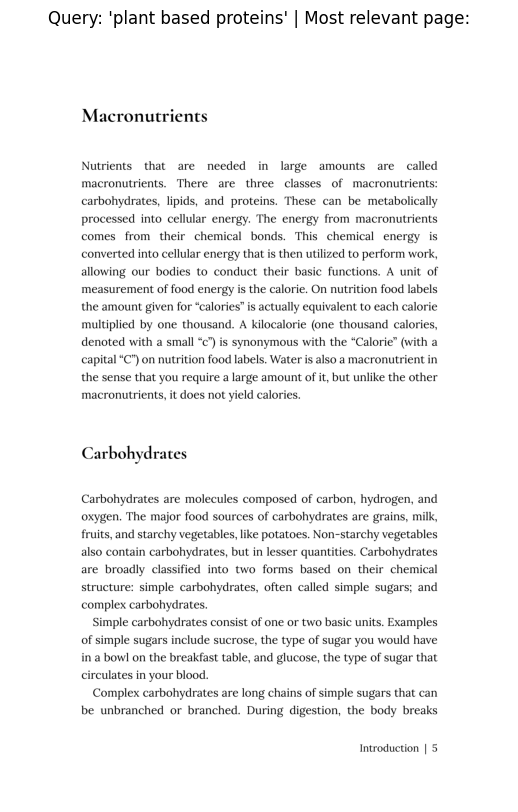

In [139]:
import fitz

# open PDF and load target
pdf_path = "human_nutrition-text.pdf"
doc = fitz.open(pdf_path)
page = doc.load_page(5 + 41)# note: page number of our PDF start at 41.

# Get the image of the page
img = page.get_pixmap(dpi=300)
# print(img)
# # Save image
# img.save("human_nutrition-text.png")
doc.close

# Convert the pixmap to a numpy array
img_array = np.frombuffer(img.samples_mv,
                         dtype=np.uint8).reshape((img.h, img.w, img.n))

# Display the image using matplotlib
import matplotlib.pyplot as plt
plt.figure(figsize=(13, 10))
plt.imshow(img_array)
plt.axis("off")
plt.title(f"Query: '{query}' | Most relevant page:")

### Functionizing our semantic search pipeline

In [140]:
def retrieve_relevant_resources(query: str,
                               embeddings: torch.tensor,
                               model: SentenceTransformer=embedding_model,
                               n_resources_to_return: int=5,
                               print_time: bool=True):
    """
    Embeds a query with model and returns top k scores and indices from embeddings.
    """

    # Embed the query
    query_embedding = model.encode(query, convert_to_tensor=True)

    # Get dot product scores on embeddings
    start_time = timer()
    dot_scores = util.dot_score(query_embedding, embeddings)[0]
    end_time = timer()

    if print_time:
        print(f"[INFO] Time taken to get scores on ({len(embeddings)} embedings : {end_time - start_time:.5f} seconds.)")

    scores , indices = torch.topk(input=dot_scores,
                                 k=n_resources_to_return)

    return scores, indices

def print_top_results_and_scores(query:str,
                                embeddings: torch.tensor,
                                pages_and_chunks: list[dict]=pages_and_chunks,
                                n_resources_to_return: int=5):
    """
    Finds relevant passages given query and prints them out along with their scores. 
    """

    scores, indices = retrieve_relevant_resources(query=query,
                                                 embeddings=embeddings,
                                                 n_resources_to_return=n_resources_to_return)

    # Loop through zipped together scores and indices from torch.topk
    for score, idx in zip(scores, indices):
        print(f"Score: {score:.4f}")
        print("Text: ")
        print_wrapped(pages_and_chunks[idx]["sentence_chunk"])
        print(f"Page number: {pages_and_chunks[idx]['page_number']}")
        print("\n")

In [141]:
query="low-carb foods source"
# retrieve_relevant_resources(query=query, embeddings=embeddings)
print_top_results_and_scores(query=query, embeddings=embeddings)

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

[INFO] Time taken to get scores on (1680 embedings : 0.00046 seconds.)
Score: 0.6051
Text: 
Foods GI Value Low GI Foods (< 55) Apple, raw 36 Orange, raw 43 Banana, raw 51 Mango, raw
51 Carrots, boiled 39 Taro, boiled 53 Corn tortilla 46 Spaghetti (whole wheat) 37 Baked
beans 48 Soy milk 34 Skim milk 37 Whole milk 39 Yogurt, fruit 41 Yogurt, plain 14 Icecream
51 Medium GI Foods (56–69) Pineapple, raw 59 Cantaloupe 65 Mashed potatoes 70 Whole-wheat
bread 69 Brown rice 55 Cheese pizza 60 Sweet potato, boiled 63 Macaroni and cheese 64
Popcorn 65 High GI Foods (70 and higher) Banana (over-ripe) 82 Corn chips 72 Digestion and
Absorption of Carbohydrates | 249
Page number: 249


Score: 0.6042
Text: 
Personal Choices Carbohydrates are in most foods so you have a great variety of choices
with which to meet the carbohydrates recommendations for a healthy diet. The 2010 Dietary
Guidelines recommends eating more unrefined carbohydrates and more fiber, and reducing
consumption of foods that are hig

### Getting a LLM for local Generation

#### Checking our local GPU memory availability

In [142]:
# Get GPU available memory
import torch
gpu_memory_bytes = torch.cuda.get_device_properties(0).total_memory
gpu_memory_gb = round(gpu_memory_bytes / (2**30))
print(f"Available GPU memory: {gpu_memory_gb} GB")

Available GPU memory: 16 GB


In [143]:
!nvidia-smi

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Fri Nov 29 13:45:35 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 560.35.03              Driver Version: 560.35.03      CUDA Version: 12.6     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla P100-PCIE-16GB           Off |   00000000:00:04.0 Off |                    0 |
| N/A   46C    P0             37W /  250W |    8145MiB /  16384MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [144]:
if gpu_memory_gb < 5.1:
    print(f"Your available GPU memory is {gpu_memory_gb}GB, you may not have enough memory to run a Gemma LLM locally without quantization.")
elif gpu_memory_gb < 8.1:
    print(f"GPU memory: {gpu_memory_gb} | Recommended model: Gemma 2B in 4-bit precision.")
    use_quantization_config = True 
    model_id = "google/gemma-2-2b-it"
elif gpu_memory_gb < 19.0:
    print(f"GPU memory: {gpu_memory_gb} | Recommended model: Gemma 2B in float16 or Gemma 7B in 4-bit precision.")
    use_quantization_config = False 
    model_id = "google/gemma-2-2b-it"
elif gpu_memory_gb > 19.0:
    print(f"GPU memory: {gpu_memory_gb} | Recommend model: Gemma 7B in 4-bit or float16 precision.")
    use_quantization_config = False 
    model_id = "google/gemma-7b-it"

print(f"use_quantization_config set to: {use_quantization_config}")
print(f"model_id set to: {model_id}")

GPU memory: 16 | Recommended model: Gemma 2B in float16 or Gemma 7B in 4-bit precision.
use_quantization_config set to: False
model_id set to: google/gemma-2-2b-it


In [145]:
torch.cuda.get_device_capability(0)[0]

6

In [146]:
import torch
from transformers import AutoTokenizer, AutoModelForCausalLM
from transformers.utils import is_flash_attn_2_available
from transformers import BitsAndBytesConfig

# 1. Create a quantization config
quantization_config = BitsAndBytesConfig(load_in_4bit=True,
                                         bnb_4bit_compute_dtype=torch.float16)

if (is_flash_attn_2_available()) and (torch.cuda.get_device_capability(0)[0] >= 8):
    attn_implementation = "flash_attention_2"
else:
    attn_implementation = "sdpa" # scaled dot product attention

# 2. Pick a model
model_id = model_id # google/gemma-2b-it

# 3. Instantiate tokenizer
tokenizer = AutoTokenizer.from_pretrained(pretrained_model_name_or_path=model_id)

# 4. Instantiate the model
llm_model = AutoModelForCausalLM.from_pretrained(pretrained_model_name_or_path=model_id,
                                                torch_dtype=torch.float16,
                                                quantization_config=quantization_confid if use_quantization_config else None,
                                                low_cpu_mem_usage=False,
                                                attn_implementation=attn_implementation)

if not use_quantization_config:
    llm_model.to("cuda")

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

In [147]:
attn_implementation

'sdpa'

In [148]:
llm_model

Gemma2ForCausalLM(
  (model): Gemma2Model(
    (embed_tokens): Embedding(256000, 2304, padding_idx=0)
    (layers): ModuleList(
      (0-25): 26 x Gemma2DecoderLayer(
        (self_attn): Gemma2SdpaAttention(
          (q_proj): Linear(in_features=2304, out_features=2048, bias=False)
          (k_proj): Linear(in_features=2304, out_features=1024, bias=False)
          (v_proj): Linear(in_features=2304, out_features=1024, bias=False)
          (o_proj): Linear(in_features=2048, out_features=2304, bias=False)
          (rotary_emb): Gemma2RotaryEmbedding()
        )
        (mlp): Gemma2MLP(
          (gate_proj): Linear(in_features=2304, out_features=9216, bias=False)
          (up_proj): Linear(in_features=2304, out_features=9216, bias=False)
          (down_proj): Linear(in_features=9216, out_features=2304, bias=False)
          (act_fn): PytorchGELUTanh()
        )
        (input_layernorm): Gemma2RMSNorm((2304,), eps=1e-06)
        (pre_feedforward_layernorm): Gemma2RMSNorm((2304,),

In [149]:
def get_model_num_paras(model: torch.nn.Module):
    return sum([param.numel() for param in model.parameters()]) 
    
get_model_num_paras(llm_model)

2614341888

In [150]:
def get_model_mem_size(model: torch.nn.Module):
    """
    Get how much memory a PyTorch model takes up.

    """
    # Get model parameters and buffer sizes
    mem_params = sum([param.nelement() * param.element_size() for param in model.parameters()])
    mem_buffers = sum([buf.nelement() * buf.element_size() for buf in model.buffers()])

    # Calculate various model sizes
    model_mem_bytes = mem_params + mem_buffers # in bytes
    model_mem_mb = model_mem_bytes / (1024**2) # in megabytes
    model_mem_gb = model_mem_bytes / (1024**3) # in gigabytes

    return {"model_mem_bytes": model_mem_bytes,
            "model_mem_mb": round(model_mem_mb, 2),
            "model_mem_gb": round(model_mem_gb, 2)}

get_model_mem_size(llm_model)

{'model_mem_bytes': 5228697088, 'model_mem_mb': 4986.47, 'model_mem_gb': 4.87}

### Generating text with our LLM

In [151]:
input_text = "What type of vitamin are essential for eyes?"
print(f"Input text:\n{input_text}")

# Create prompt template for instruction-tuned model
dialogue_template = [
    {"role": "user",
     "content": input_text}
]

# Apply the chat template
prompt = tokenizer.apply_chat_template(conversation=dialogue_template,
                                       tokenize=False, # keep as raw text (not tokenized)
                                       add_generation_prompt=True)

print(f"\nPrompt (formatted):\n{prompt}")

Input text:
What type of vitamin are essential for eyes?

Prompt (formatted):
<bos><start_of_turn>user
What type of vitamin are essential for eyes?<end_of_turn>
<start_of_turn>model



In [152]:
%%time

# Tokenize the input text (turn it into numbers) and sent it to the GPU
input_ids = tokenizer(prompt,
                     return_tensors="pt").to("cuda")

# Generate outputs from local LLM
outputs = llm_model.generate(**input_ids,
                            max_new_tokens=256)

print(f"Model output (tokens):\n{outputs[0]}\n")

Model output (tokens):
tensor([     2,      2,    106,   1645,    108,   1841,   1916,    576,  23042,
           708,   8727,    604,   4628, 235336,    107,    108,    106,   2516,
           108,  41105,  48765,    708,   8727,    604,   9606,   4628, 235269,
           901,    573,   1546,   2845,   6162,    708, 235292,    109,    688,
         62651,    586,  66058,    108, 235287,   5231,  11071,  66058, 231510,
           604,   9678, 235269,   5199,    575,   3178,   2611,   4202, 235265,
          1165, 235303, 235256,    476,   2621,   8350,    576, 196103,   5819,
           473, 235269,    476,  59516,    575,    573,  78601,    674,   7154,
           917,   1443,    575,   7675,   2611, 235265,    108, 235287,   5231,
         17803,  66058,   5550, 120791,    591,  10558,    575,   8205,   3773,
          1154,  19967, 235269,  31062, 235269,  12776,    823,  18820, 235290,
          2269, 138222,    591,  10558,    575,  10436,    578,   8123,  16803,
           578,  

In [153]:
# Decode the output tokens to text
outputs_decoded = tokenizer.decode(outputs[0])
print(f"Model output (decoded):\n{outputs_decoded}\n")

Model output (decoded):
<bos><bos><start_of_turn>user
What type of vitamin are essential for eyes?<end_of_turn>
<start_of_turn>model
Several vitamins are essential for healthy eyes, but the most important ones are:

**Vitamin A:**
* **Role:** Crucial for vision, especially in low light conditions. It's a key component of rhodopsin, a pigment in the retina that helps us see in dim light.
* **Sources:** Retinol (found in animal products like liver, dairy, eggs), beta-carotene (found in orange and yellow fruits and vegetables like carrots, sweet potatoes, and spinach).

**Vitamin C:**
* **Role:**  Important for the production of collagen, which helps maintain the structural integrity of the cornea and other eye tissues. It also acts as an antioxidant, protecting the eyes from damage caused by free radicals.
* **Sources:** Citrus fruits, strawberries, bell peppers, broccoli, tomatoes.

**Vitamin E:**
* **Role:** Another powerful antioxidant that protects the eyes from damage caused by free

In [154]:
# Nutrition-style questions generated with GPT4
gpt4_questions = [
    "What are the macronutrients, and what roles do they play in the human body?",
    "How do vitamins and minerals differ in their roles and importance for health?",
    "Describe the process of digestion and absorption of nutrients in the human body.",
    "What role does fibre play in digestion? Name five fibre containing foods.",
    "Explain the concept of energy balance and its importance in weight management."
]

# Manually created question list
manual_questions = [
    "What are symptoms of pellagra?",
    "What is the RDI for protein per day?",
    "water soluble vitamins",
    "Veg food items that contains vitamin-b12",
]

query_list = gpt4_questions + manual_questions

In [155]:
import random

query = random.choice(query_list)
print(f"Query: {query}")

# Get just the scores and indices of top related results
scores, indices = retrieve_relevant_resources(query=query,
                                             embeddings=embeddings)
scores, indices

Query: Describe the process of digestion and absorption of nutrients in the human body.


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

[INFO] Time taken to get scores on (1680 embedings : 0.00019 seconds.)


(tensor([0.7485, 0.7013, 0.6914, 0.6755, 0.6625], device='cuda:0'),
 tensor([125, 134, 380, 148, 681], device='cuda:0'))

### Augmenting our prompt with context items 

In [156]:
def prompt_formatter(query: str, 
                     context_items: list[dict]) -> str:
    """
    Augments query with text-based context from context_items.
    """
    # Join context items into one dotted paragraph
    context = "- " + "\n- ".join([item["sentence_chunk"] for item in context_items])

    # Create a base prompt with examples to help the model
    base_prompt = """Based on the following context items, please answer the query.
Give yourself room to think by extracting relevant passages from the context before answering the query.
Don't return the thinking, only return the answer.
Make sure your answers are as explanatory as possible.
Use the following examples as reference for the ideal answer style.
\nExample 1:
Query: What are the fat-soluble vitamins?
Answer: The fat-soluble vitamins include Vitamin A, Vitamin D, Vitamin E, and Vitamin K. These vitamins are absorbed along with fats in the diet and can be stored in the body's fatty tissue and liver for later use. Vitamin A is important for vision, immune function, and skin health. Vitamin D plays a critical role in calcium absorption and bone health. Vitamin E acts as an antioxidant, protecting cells from damage. Vitamin K is essential for blood clotting and bone metabolism.
\nExample 2:
Query: What are the causes of type 2 diabetes?
Answer: Type 2 diabetes is often associated with overnutrition, particularly the overconsumption of calories leading to obesity. Factors include a diet high in refined sugars and saturated fats, which can lead to insulin resistance, a condition where the body's cells do not respond effectively to insulin. Over time, the pancreas cannot produce enough insulin to manage blood sugar levels, resulting in type 2 diabetes. Additionally, excessive caloric intake without sufficient physical activity exacerbates the risk by promoting weight gain and fat accumulation, particularly around the abdomen, further contributing to insulin resistance.
\nExample 3:
Query: What is the importance of hydration for physical performance?
Answer: Hydration is crucial for physical performance because water plays key roles in maintaining blood volume, regulating body temperature, and ensuring the transport of nutrients and oxygen to cells. Adequate hydration is essential for optimal muscle function, endurance, and recovery. Dehydration can lead to decreased performance, fatigue, and increased risk of heat-related illnesses, such as heat stroke. Drinking sufficient water before, during, and after exercise helps ensure peak physical performance and recovery.
\nNow use the following context items to answer the user query:
{context}
\nRelevant passages: <extract relevant passages from the context here>
User query: {query}
Answer:"""

    # Update base prompt with context items and query   
    base_prompt = base_prompt.format(context=context, query=query)

    # Create prompt template for instruction-tuned model
    dialogue_template = [
        {"role": "user",
        "content": base_prompt}
    ]

    # Apply the chat template
    prompt = tokenizer.apply_chat_template(conversation=dialogue_template,
                                          tokenize=False,
                                          add_generation_prompt=True)
    return prompt


In [157]:
query = random.choice(query_list)
print(f"Query: {query}")

# Get relevant resources
scores, indices = retrieve_relevant_resources(query=query,
                                              embeddings=embeddings)
    
# Create a list of context items
context_items = [pages_and_chunks[i] for i in indices]

# Format prompt with context items
prompt = prompt_formatter(query=query,
                          context_items=context_items)
print(prompt)

Query: Describe the process of digestion and absorption of nutrients in the human body.


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

[INFO] Time taken to get scores on (1680 embedings : 0.00024 seconds.)
<bos><start_of_turn>user
Based on the following context items, please answer the query.
Give yourself room to think by extracting relevant passages from the context before answering the query.
Don't return the thinking, only return the answer.
Make sure your answers are as explanatory as possible.
Use the following examples as reference for the ideal answer style.

Example 1:
Query: What are the fat-soluble vitamins?
Answer: The fat-soluble vitamins include Vitamin A, Vitamin D, Vitamin E, and Vitamin K. These vitamins are absorbed along with fats in the diet and can be stored in the body's fatty tissue and liver for later use. Vitamin A is important for vision, immune function, and skin health. Vitamin D plays a critical role in calcium absorption and bone health. Vitamin E acts as an antioxidant, protecting cells from damage. Vitamin K is essential for blood clotting and bone metabolism.

Example 2:
Query: What ar

In [158]:
%%time

input_ids = tokenizer(prompt, return_tensors="pt").to("cuda")

# Generate an output of tokens
outputs = llm_model.generate(**input_ids,
                            temperature=0.7,
                            do_sample=True,
                            max_new_tokens=256
                            )

# Turn the output tokens into text
output_text = tokenizer.decode(outputs[0])
print(f"RAG answer:\n{output_text.replace(prompt, '')}")

RAG answer:
<bos>The process of digestion begins even before food is eaten, with the brain triggering the process of hunger and preparing the body for a meal. Once food is ingested, the digestive system, composed of the mouth, pharynx, esophagus, stomach, small intestine, large intestine, rectum, and anus, starts breaking down food into smaller components for absorption. 

This process works on two levels: mechanically, moving and mixing the food, and chemically, breaking down the food through digestive juices.  These smaller components are then absorbed into the bloodstream.  

The process begins in the mouth with the enzyme salivary amylase breaking down starches. The stomach further breaks down food through acidic juices. The small intestine is the primary site of nutrient absorption, with the broken-down nutrients absorbed into the bloodstream through the intestinal wall. 

Monosaccharides and amino acids are absorbed directly, while fatty acids and other fat-soluble molecules are 

In [159]:
def ask(query: str,
       temperature: float=0.7,
       max_new_tokens: int=256,
       format_answer_text=True,
       return_answer_only=True):
    """
    Takes a query, finds relevant resources/context and generates an answer to the query based on the relevant resources.
    """

    # Get just the scores and indices of top related results
    scores, indices = retrieve_relevant_resources(query=query,
                                                 embeddings=embeddings)
    # Create a list of context item
    context_items = [pages_and_chunks[i] for i in indices]

    # Add score to context item
    for i, item in enumerate(context_items):
        item["scores"] = scores[i].cpu()

    # AUMENTATION
    # Create the prompt and format it with context items
    prompt = prompt_formatter(query=query,
                             context_items=context_items)

    # GENERATION
    # Tokenize the prompt
    input_ids = tokenizer(prompt, return_tensors="pt").to("cuda")

    # Generate an output of tokens
    outputs = llm_model.generate(**input_ids,
                                temperature=temperature,
                                do_sample=True,
                                max_new_tokens=max_new_tokens)

    # Decode the tokens into text
    output_text = tokenizer.decode(outputs[0])

    # Format the tokens into text
    if format_answer_text:
        # Replace prompt and special tokens
        output_text = output_text.replace(prompt, "").replace("<bos>", "").replace("<eos>", "")

    if return_answer_only:
        return output_text
        
    return output_text, context_items

In [160]:
query = random.choice(query_list)
print(f"Query: {query}")
ask(query=query,
   temperature=0.7,
   return_answer_only=True)

Query: water soluble vitamins


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

[INFO] Time taken to get scores on (1680 embedings : 0.00074 seconds.)


'Water-soluble vitamins, like choline, are absorbed in the small intestine and transported to the liver through blood vessels. Unlike fat-soluble vitamins which are absorbed along with dietary fat and packaged into chylomicrons, water-soluble vitamins are directly transported to the liver for use. They play a critical role in metabolism and blood function and renewal.  For example, water-soluble vitamins are crucial for converting a substrate into an end-product and are a vital part of enzymes. Many water-soluble vitamins are also important for blood renewal and function. \n<end_of_turn>'